Importing the required packages

In [2]:
import numpy as np
import pandas as pd

Import the data

In [3]:
df_train = pd.read_csv('Datafiniti_Hotel_Reviews_Jun19.csv')
df_train.head()

,id,dateAdded,dateUpdated,address,categories,primaryCategories,city,country,keys,latitude,...,reviews.dateSeen,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,sourceURLs,websites
0,AWE2FvX5RxPSIh2RscTK,2018-01-18T18:43:12Z,2019-05-20T23:55:47Z,5620 Calle Real,"Hotels,Hotels and motels,Hotel and motel mgmt....",Accommodation & Food Services,Goleta,US,us/ca/goleta/5620callereal/-1127060008,34.44178,...,2018-01-03T00:00:00Z,3,https://www.tripadvisor.com/Hotel_Review-g3243...,"This hotel was nice and quiet. Did not know, t...",Best Western Plus Hotel,San Jose,UnitedStates,tatsurok2018,https://www.tripadvisor.com/Hotel_Review-g3243...,https://www.bestwestern.com/en_US/book/hotel-r...
1,AVwcj_OhkufWRAb5wi9T,2016-11-06T20:21:05Z,2019-05-20T23:31:56Z,5th And San Carlos PO Box 3574,"Hotels,Lodging,Hotel",Accommodation & Food Services,Carmel by the Sea,US,us/ca/carmelbythesea/5thandsancarlospobox3574/...,36.55722,...,2016-10-09T00:00:00Z,4,https://www.tripadvisor.com/Hotel_Review-g3217...,We stayed in the king suite with the separatio...,Clean rooms at solid rates in the heart of Carmel,San Francisco,CA,STEPHEN N,http://www.tripadvisor.com/Hotel_Review-g32172...,http://www.bestwestern.com
2,AVwcj_OhkufWRAb5wi9T,2016-11-06T20:21:05Z,2019-05-20T23:31:56Z,5th And San Carlos PO Box 3574,"Hotels,Lodging,Hotel",Accommodation & Food Services,Carmel by the Sea,US,us/ca/carmelbythesea/5thandsancarlospobox3574/...,36.55722,...,2016-10-09T00:00:00Z,3,https://www.tripadvisor.com/Hotel_Review-g3217...,"Parking was horrible, somebody ran into my ren...",Business,Prescott Valley,AZ,15Deborah,http://www.tripadvisor.com/Hotel_Review-g32172...,http://www.bestwestern.com
3,AVwcj_OhkufWRAb5wi9T,2016-11-06T20:21:05Z,2019-05-20T23:31:56Z,5th And San Carlos PO Box 3574,"Hotels,Lodging,Hotel",Accommodation & Food Services,Carmel by the Sea,US,us/ca/carmelbythesea/5thandsancarlospobox3574/...,36.55722,...,2016-10-31T00:00:00Z,5,https://www.tripadvisor.com/Hotel_Review-g3217...,Not cheap but excellent location. Price is som...,Very good,Guaynabo,PR,Wilfredo M,http://www.tripadvisor.com/Hotel_Review-g32172...,http://www.bestwestern.com
4,AVwcj_OhkufWRAb5wi9T,2016-11-06T20:21:05Z,2019-05-20T23:31:56Z,5th And San Carlos PO Box 3574,"Hotels,Lodging,Hotel",Accommodation & Food Services,Carmel by the Sea,US,us/ca/carmelbythesea/5thandsancarlospobox3574/...,36.55722,...,"2016-10-09T00:00:00Z,2016-03-27T00:00:00Z",2,https://www.tripadvisor.com/Hotel_Review-g3217...,If you get the room that they advertised on th...,Low chance to come back here,Reno,NV,Luc D,http://www.tripadvisor.com/Hotel_Review-g32172...,http://www.bestwestern.com


In [6]:
from io import StringIO
col = ['reviews.rating', 'reviews.text']
df_train = df_train[col]
df_train = df_train[pd.notnull(df_train['reviews.text'])]
df_train.columns = ['reviews.rating', 'reviews.text']

df_train['category_id'] = df_train['reviews.rating'].factorize()[0]

category_id_df_train = df_train[['reviews.rating', 'category_id']].drop_duplicates().sort_values('category_id')

category_to_id = dict(category_id_df_train.values)

id_to_category = dict(category_id_df_train[['category_id', 'reviews.rating']].values)

df_train.head()

,reviews.rating,reviews.text,category_id
0,3,"This hotel was nice and quiet. Did not know, t...",0
1,4,We stayed in the king suite with the separatio...,1
2,3,"Parking was horrible, somebody ran into my ren...",0
3,5,Not cheap but excellent location. Price is som...,2
4,2,If you get the room that they advertised on th...,3


The data visualization

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

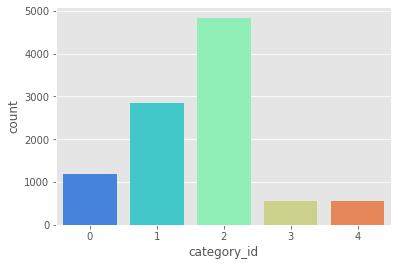

In [20]:
sns.countplot(x='category_id',data=df_train, palette='rainbow')

Train Test Split

In [8]:
from sklearn.model_selection import train_test_split

premise = df_train['reviews.text'].values
y = df_train['category_id'].values

sentences_train, sentences_test, y_train, y_test = train_test_split(premise, y, test_size = 0.25,
                                                                   random_state = 1000)

Import CountVectorizer

In [10]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
vectorizer.fit(sentences_train)
X_train = vectorizer.transform(sentences_train)
X_test = vectorizer.transform(sentences_test)

X_train

<7500x19230 sparse matrix of type '<class 'numpy.int64'>'
	with 569193 stored elements in Compressed Sparse Row format>

Import LogisticRegression model

In [11]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
classifier.fit(X_train, y_train)
score = classifier.score(X_test, y_test)

print("Accuracy:", score)

/home/chi/anaconda3/envs/nltkEnv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/chi/anaconda3/envs/nltkEnv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Accuracy: 0.6004


Deep Neural Networks 

In [12]:
from keras.models import Sequential
from keras import layers

input_dim = X_train.shape[1] #Number of features

model = Sequential()
model.add(layers.Dense(10, input_dim = input_dim, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

Using TensorFlow backend.


Before you can start with the training of the model, you need to configure the learning process. This is done with the .compile() method.

In [13]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                192310    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 192,321
Trainable params: 192,321
Non-trainable params: 0
_________________________________________________________________


Now it is time to start your training with the .fit() function

Since the training in neural networks is an iterative process, the training won't just stop after its done. These complited iterations are commonly called epochs. Another parameteryou have to your selection is the batch size.

In [14]:
history = model.fit(X_train, y_train,
                   epochs = 100,
                   verbose = False,
                   validation_data = (X_test, y_test),
                   batch_size = 10)

Now you can use the .evaluate() method to measure the accuracy of the model. You can do this both for the training data and testing data.

In [15]:
loss, accuracy = model.evaluate(X_train, y_train, verbose = False)
print("Training Accuracy: {:.4f}".format(accuracy))

Training Accuracy: 0.2796


In [16]:
loss, accuracy = model.evaluate(X_test, y_test, verbose = False)
print("Testing Accuracy: {:.4f}".format(accuracy))

Testing Accuracy: 0.3008


Visualize the loss and accuracy for the training and testing data based on the history call back

In [17]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss =history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)
    
    plt.figure(figsize = (12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc,  'b', label = 'Training acc')
    plt.plot(x, val_acc, 'r', label = 'Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label = 'Training loss')
    plt.plot(x, val_loss, 'r', label = 'Validation loss')
    plt.title('Training and validation loss')
    
    plt.legend()

Call plot_history() with the collected accuracy and loss inside the history dictionary

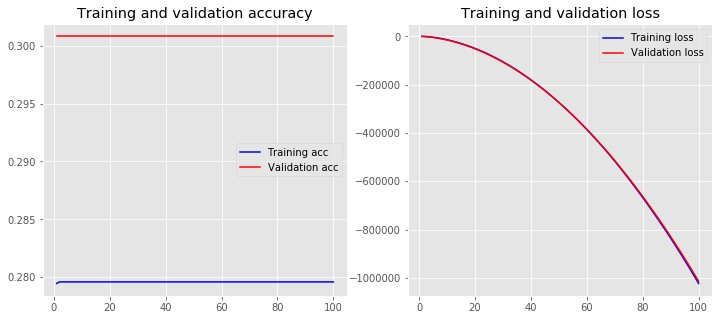

In [18]:
 plot_history(history)